## 介绍

scikit-learn是python主流机器学习工具包，涵盖几乎主流的机器学习算法的实现，并提供统一的调用接口，基于Numpy和scipy等实现

适合小规模使用
不支持分布式计算，不适合处理大规模数据

以最小二乘法为例

目标函数是最小化样本真值与预测值的方差
$$argmin(\sum {(\hat{y}-y)}^2)$$

In [1]:
from sklearn import linear_model
import numpy as np

x = np.array([[0, 1], [3, -2], [2, 3]])
y = np.array([0.5, 0.3, 0.9])

lr = linear_model.LinearRegression()
%time lr.fit(x, y) # 训练，拟合

print("intercept:", lr.intercept_)
print("coef:", lr.coef_)
lr.predict([[1,2],[-3,2]])

Wall time: 1.96 ms
intercept: 0.3666666666666667
coef: [0.06666667 0.13333333]


array([0.7       , 0.43333333])

alpha 1.000000e-15 :
intercept: 206390.15471722043 
coef: [   63160.07035445  -773849.39429177  1573210.86260772 -1602994.57320523
    23329.90381911  1191311.26593498  -102767.7806561  -1048717.67783043
    80902.53986808  1079319.84397274  -811312.91099997   184851.21631806]
alpha 1.000000e-12 :
intercept: 12676.706230288351 
coef: [  4580.50908561 -34910.30998879  40704.22490436 -10640.34159966
 -22561.76805998   5495.3456707   17623.2393316    1942.74547218
 -13437.70137974  -5306.76144473  12385.97026632  -4024.46694425]
alpha 1.000000e-05 :
intercept: -7.933063396256101 
coef: [-9.01083498  6.53826019  8.02434978  0.81412812 -4.98524037 -4.76977984
 -0.15321844  4.21422257  4.17121674 -0.92094419 -5.75505138  2.77921496]
alpha 1.000000e+00 :
intercept: 0.7221844063308203 
coef: [ 0.03618682  0.03408954  0.04707745  0.03797379  0.01702457 -0.00457319
 -0.01837177 -0.02020522 -0.01083871  0.0037878   0.01251564 -0.00097443]


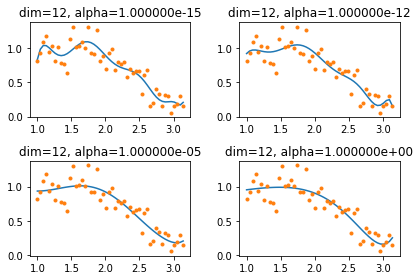

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

def make_data(nDim):
    x0=np.linspace(1, np.pi, 50)
    x=np.vstack([[x0, ], [i**x0 for i in range(2, nDim+1)]])
    y=np.sin(x0)+np.random.normal(0,0.15,len(x0))
    return x.transpose(), y

def linear_regression():
    alphas = [1e-15, 1e-12, 1e-5, 1,]  # 备选超参值
    
    for idx, i in enumerate(alphas):
        plt.subplot(2, len(alphas)/2, idx+1)
        lr = linear_model.Ridge(alpha=i)
        
        sub_x = x[:, 0:12]
        lr.fit(sub_x, y)
        plt.plot(x[:, 0], lr.predict(sub_x))
        plt.plot(x[:, 0], y, ".")
        plt.title("dim=12, alpha=%e"%i)
        
        print("alpha %e :"%i)
        print("intercept: %s "%(lr.intercept_,))
        print("coef: %s"%(lr.coef_,))
    plt.tight_layout()
    plt.show()

x,y =make_data(12)
linear_regression()

### 岭回归 Ridge Regression

针对最小二乘法的缺点，随着特征维度的增加而出现线性模型的过拟合现象，通过改变目标函数，达到控制回归参数值疯狂增长的目的。

$$argmin(\sum {(\hat{y}-y)}^2+\alpha\sum{w^2})$$

其中，$\alpha$是一个超参数，w是线性模型中的所有参数，公式中的$\alpha\sum{w^2}$也被称为L2 惩罚项

alpha 1.000000e-15 :
intercept: 206390.15471722043 
coef: [   63160.07035445  -773849.39429177  1573210.86260772 -1602994.57320523
    23329.90381911  1191311.26593498  -102767.7806561  -1048717.67783043
    80902.53986808  1079319.84397274  -811312.91099997   184851.21631806]
alpha 1.000000e-12 :
intercept: 12676.706230288351 
coef: [  4580.50908561 -34910.30998879  40704.22490436 -10640.34159966
 -22561.76805998   5495.3456707   17623.2393316    1942.74547218
 -13437.70137974  -5306.76144473  12385.97026632  -4024.46694425]
alpha 1.000000e-05 :
intercept: -7.933063396256101 
coef: [-9.01083498  6.53826019  8.02434978  0.81412812 -4.98524037 -4.76977984
 -0.15321844  4.21422257  4.17121674 -0.92094419 -5.75505138  2.77921496]
alpha 1.000000e+00 :
intercept: 0.7221844063308203 
coef: [ 0.03618682  0.03408954  0.04707745  0.03797379  0.01702457 -0.00457319
 -0.01837177 -0.02020522 -0.01083871  0.0037878   0.01251564 -0.00097443]


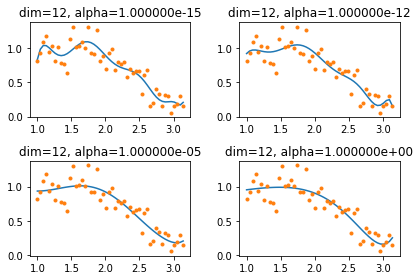

In [3]:
def ridge_regression():
    alphas = [1e-15, 1e-12, 1e-5, 1,]  # 备选超参值
    
    for idx, i in enumerate(alphas):
        plt.subplot(2, len(alphas)/2, idx+1)
        ridge = linear_model.Ridge(alpha=i)
        
        sub_x = x[:, 0:12]
        ridge.fit(sub_x, y)
        plt.plot(x[:, 0], ridge.predict(sub_x))
        plt.plot(x[:, 0], y, ".")
        plt.title("dim=12, alpha=%e"%i)
        
        print("alpha %e :"%i)
        print("intercept: %s "%(ridge.intercept_,))
        print("coef: %s"%(ridge.coef_,))
    plt.tight_layout()
    plt.show()


ridge_regression()

### Lasso 回归

上面岭回归还是存在问题，因为有些特征对结果的影响微乎其微，但是其仍然被赋予了一个非常小的回归系数，增加了模型计算的开销，很多时候也不会给模型带来性能提升。在大型计算密集应用中，会产生较大的资源浪费。

Lasso是将不重要的特征参数设为0的模型，目标函数如下：

$$argmin(\sum {(\hat{y}-y)}^2+\alpha\sum{|w|})$$

其中 $\alpha\sum{|w|}$ 被称为L1惩罚项，惩罚效果比L2严厉很多（可以产生稀疏回归参数，即多数回归参数为0）

alpha 1.000000e-15 :
intercept: 1.0256099080739616 
coef: [ 9.06846717e-01 -4.38210791e-01 -3.08499112e-02 -3.27133156e-03
  7.02814299e-05  4.52342298e-04  3.94959786e-04  2.93686447e-04
  2.11643712e-04  1.52752770e-04  1.11572196e-04  8.27343431e-05]
alpha 1.000000e-12 :
intercept: 1.0256099080557548 
coef: [ 9.06846717e-01 -4.38210791e-01 -3.08499112e-02 -3.27133156e-03
  7.02814296e-05  4.52342298e-04  3.94959786e-04  2.93686447e-04
  2.11643712e-04  1.52752770e-04  1.11572196e-04  8.27343431e-05]
alpha 1.000000e-05 :
intercept: 1.0230476743057688 
coef: [ 9.13812632e-01 -4.40279984e-01 -3.12242737e-02 -3.30488712e-03
  7.13042242e-05  4.57019423e-04  3.99276852e-04  2.96811702e-04
  2.13860485e-04  1.54337638e-04  1.12722214e-04  8.35831872e-05]
alpha 1.000000e+00 :
intercept: 1.0022693539834038 
coef: [-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -3.71032554e-03 -1.04502148e-03 -2.66541222e-04 -6.98462745e-05
 -1.40173468e-05 -0.00000000e+00 -0.00000000e+00 -

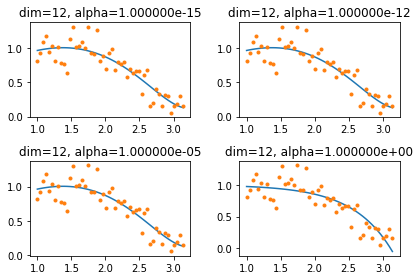

In [4]:
def lasso_regression():
    alphas = [1e-15, 1e-12, 1e-5, 1,]  # 备选超参值
    
    for idx, i in enumerate(alphas):
        plt.subplot(2, len(alphas)/2, idx+1)
        lasso = linear_model.Lasso(alpha=i, tol=1e-1) # 如果不设置tol（收敛精度），默认的lasso会警告未收敛，尝试max_iter=100000000耗时很久依然未收敛，
        
        sub_x = x[:, 0:12]
        lasso.fit(sub_x, y)
        plt.plot(x[:, 0], lasso.predict(sub_x))
        plt.plot(x[:, 0], y, ".")
        plt.title("dim=12, alpha=%e"%i)
        
        print("alpha %e :"%i)
        print("intercept: %s "%(lasso.intercept_,))
        print("coef: %s"%(lasso.coef_,))
    plt.tight_layout()
    plt.show()

lasso_regression()

### 随机梯度下降

sgd是神经网络训练的基础，是一种不保证求得全局最优解的权衡方法


In [5]:
from sklearn.linear_model import SGDRegressor

X=[[0,0],[2,1],[5,4]]
Y=[0,2,2]

lr=SGDRegressor(penalty="l2", max_iter=10000) # penalty是损失函数惩罚项，取值"None", "l1","l2","elasticnet"
lr.fit(X,Y)
lr.predict([[4,3]])
print("intercept: ", lr.intercept_)
print("coef: ", lr.coef_)

intercept:  [0.16109652]
coef:  [0.32243963 0.14452978]


SGDClassifier与SGDRegressor参数类似，返回结果有些不同，前者是一定返回训练数据的目标值之一，后者是假设函数直接计算的结果

In [6]:
from sklearn.linear_model import SGDClassifier
clf=SGDClassifier(penalty="l2", max_iter=100)
clf.fit(X,Y)
clf.predict([[4,3]])

array([2])

### 支持向量机

针对线性不可分问题，通过核函数转换为对偶问题求解。

scikit-learn 没有实现复杂的SVM算法，而是调用两个c++库libsvm, liblinear。

In [7]:
from sklearn import svm
X = [[0,0], [2,2]]
Y=[1,2]
clf = svm.SVC(kernel="rbf")
clf.fit(X,Y)
t=[[2,1],[0,1]]
print(clf.predict(t))
print(clf.decision_function(t))

[2 1]
[ 0.52444566 -0.52444566]
